In [1]:
import pathlib
import sys
import os

# Hacky way to get to root package
if "notebooks" in os.getcwd():
    os.chdir("..")


In [2]:
%load_ext autoreload
%autoreload 2
    
import sys
from data_container import load_scouted_data
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
scouted_data = load_scouted_data()
scouted_data

,Scouter Initials,Match Number,Team Number,No Show,Auto Fuel,Auto Climbing Status,Auto Human Player Score,Teleop Fuel,Teleop Human Player Score,Endgame Climbing Level
0,abc,1,1678,False,14,True,12,49,6,L1
1,abc,1,3504,True,15,True,10,20,3,NaN
2,abc,1,8393,False,13,False,6,152,8,L2
3,abc,1,118,True,9,True,2,175,5,L1
4,abc,1,254,True,4,False,3,12,18,L3
5,abc,1,67,False,12,True,16,98,13,L1
6,abc,2,8393,False,7,False,10,190,8,L1
7,abc,2,67,True,15,True,7,144,30,L2
8,abc,2,118,True,3,True,14,64,26,NaN
9,abc,2,1678,False,2,False,1,198,0,L2


In [19]:
df = pd.DataFrame(scouted_data.copy())
print(df)

level_to_points = {"L1": 10, "L2": 20, "L3": 30}
level_to_points = {"L1": 10, "L2": 20, "L3": 30}
df["climb_points"] = df["Endgame Climbing Level"].map(level_to_points).fillna(0).astype(int)

df["Endgame Climbing Level"] = df["Endgame Climbing Level"].map(level_to_points)


   Scouter Initials  Match Number  Team Number  No Show  Auto Fuel  \
0               abc             1         1678    False         14   
1               abc             1         3504     True         15   
2               abc             1         8393    False         13   
3               abc             1          118     True          9   
4               abc             1          254     True          4   
5               abc             1           67    False         12   
6               abc             2         8393    False          7   
7               abc             2           67     True         15   
8               abc             2          118     True          3   
9               abc             2         1678    False          2   
10              abc             2         2056     True         10   
11              abc             2         3504    False         24   
12              abc             3           67    False          6   
13              abc 

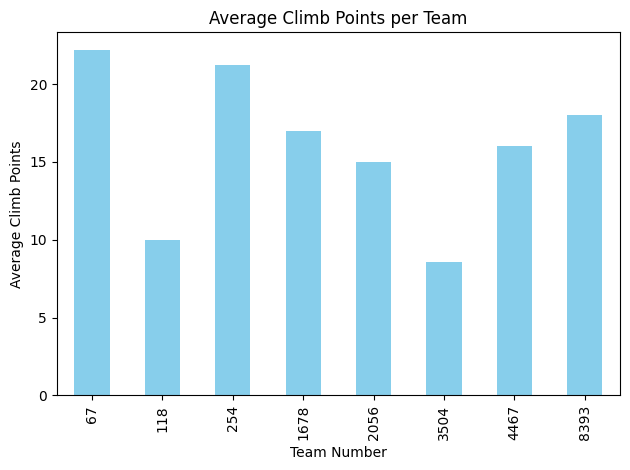

In [29]:
team_avg = scouted_data.groupby("Team Number")["climb_points"].mean()

level_to_points = {"L1": 10, "L2": 20, "L3": 30}
scouted_data["climb_points"] = scouted_data["Endgame Climbing Level"].map(level_to_points).fillna(0).astype(int)

import matplotlib.pyplot as plt

team_avg.plot(kind="bar", color="skyblue")
plt.ylabel("Average Climb Points")
plt.xlabel("Team Number")
plt.title("Average Climb Points per Team")
plt.tight_layout()
plt.show()

In [2]:
!pip install matplotlib